In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import shap
import warnings
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(123)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read data
df = pd.read_csv('C:\\Users\\user\\Desktop\\EMORY\\intro to BA\\finalproject\\ds_salaries.csv')

# Exploratory Data Analysis (EDA)

In [3]:
# DATA Distribution
cat = ['experience_level','employment_type','job_title', 'salary_currency','employee_residence', 'company_location', 'company_size', 'work_year','remote_ratio']
num = ['salary', 'salary_in_usd']

### Numeric attributes
#### We observe that salary and salary_in_usd should be the numeric attributes.
#### Especially, salary have high skewness


In [4]:
df_num = df[num].describe()
df_num.loc['skewness'] = df[num].skew()
df_num.loc['kurtosis'] = df[num].kurtosis()
df_num

,salary,salary_in_usd
count,3.755000e+03,3755.000000
mean,1.906956e+05,137570.389880
std,6.716765e+05,63055.625278
min,6.000000e+03,5132.000000
25%,1.000000e+05,95000.000000
50%,1.380000e+05,135000.000000
75%,1.800000e+05,175000.000000
max,3.040000e+07,450000.000000
skewness,2.893793e+01,0.536401
kurtosis,1.147567e+03,0.834006


### Categorical attributes
#### We observe that experience_level, employment_type, job_title, salary_currency, employee_residence, company_location and company_size should be the categorical attributes.
#### All of them have high skewness

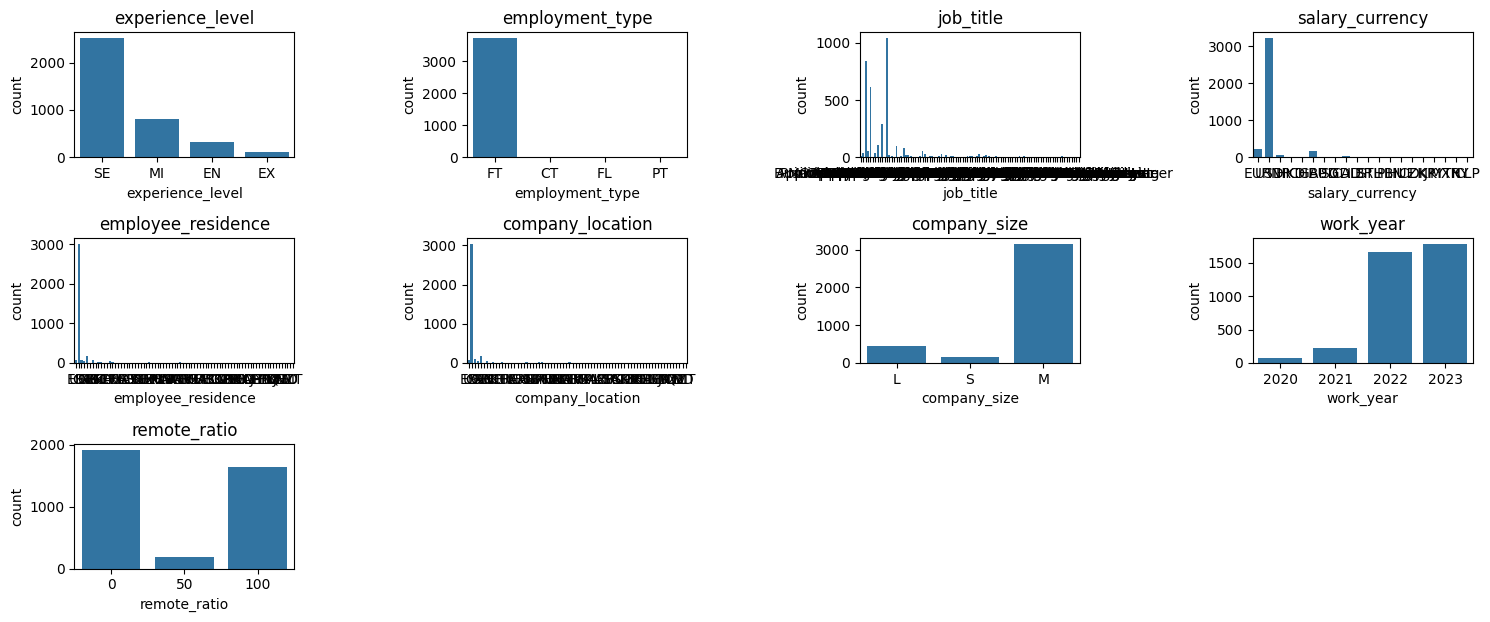

In [5]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat):
    plt.subplot(5, 4, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.tight_layout()

plt.show()

## Target variable attribute
#### We set salary_in_usd as our target variable


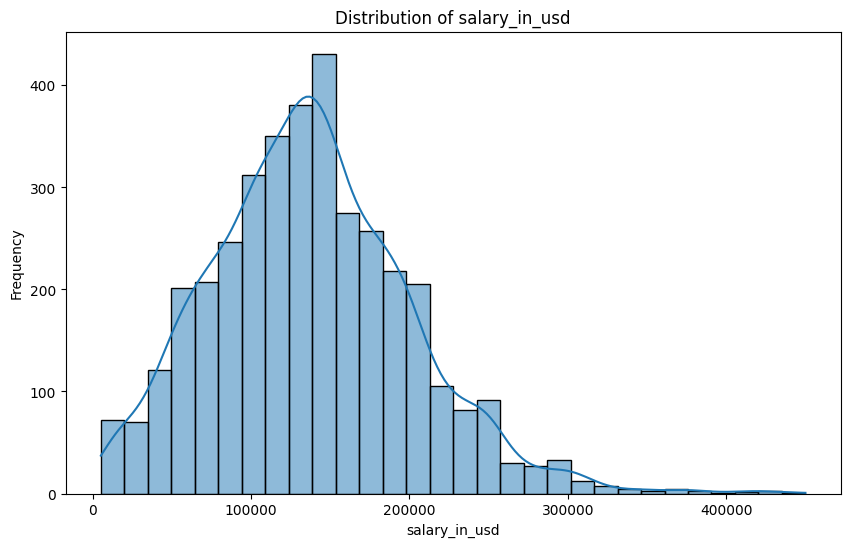

In [6]:

plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30)
plt.title('Distribution of salary_in_usd')
plt.xlabel('salary_in_usd')
plt.ylabel('Frequency')
plt.show()

#### We also observe the relationship between each x variables and our target variable

C:\Users\user\AppData\Local\Temp\ipykernel_6184\765653169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='salary_in_usd', palette="viridis")


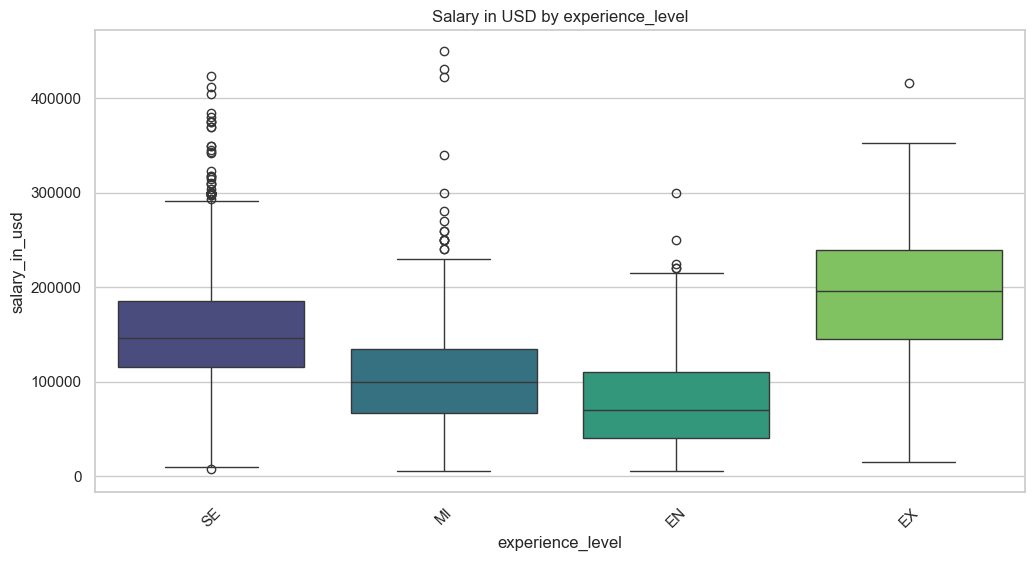

C:\Users\user\AppData\Local\Temp\ipykernel_6184\765653169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='salary_in_usd', palette="viridis")


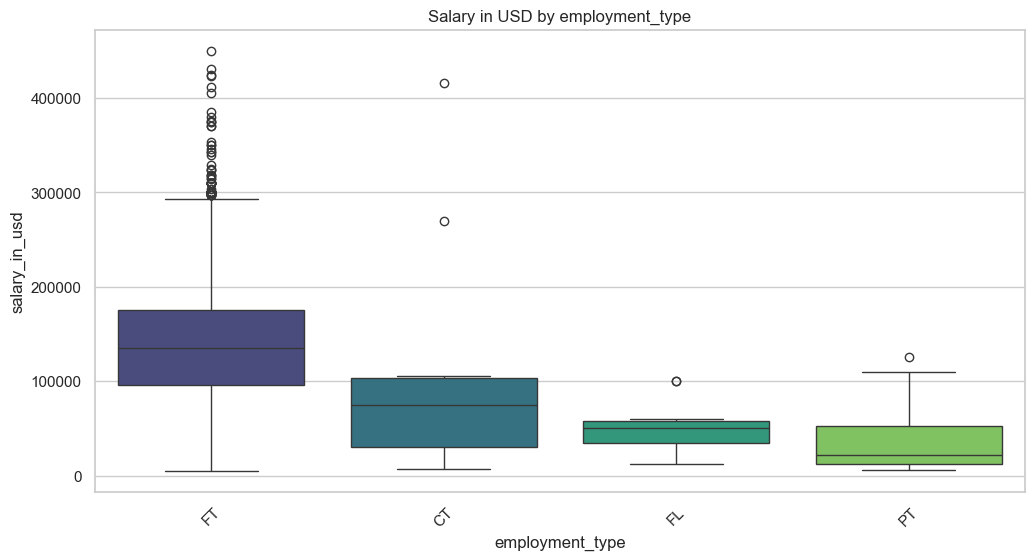

C:\Users\user\AppData\Local\Temp\ipykernel_6184\765653169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='salary_in_usd', palette="viridis")


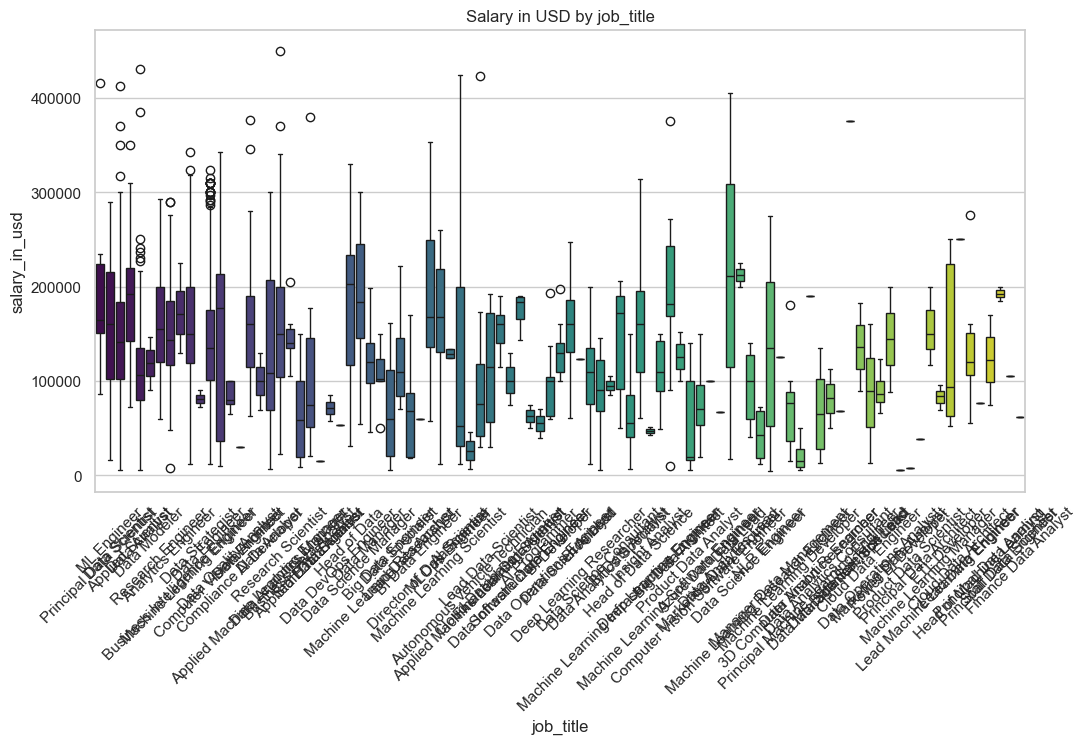

C:\Users\user\AppData\Local\Temp\ipykernel_6184\765653169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='salary_in_usd', palette="viridis")


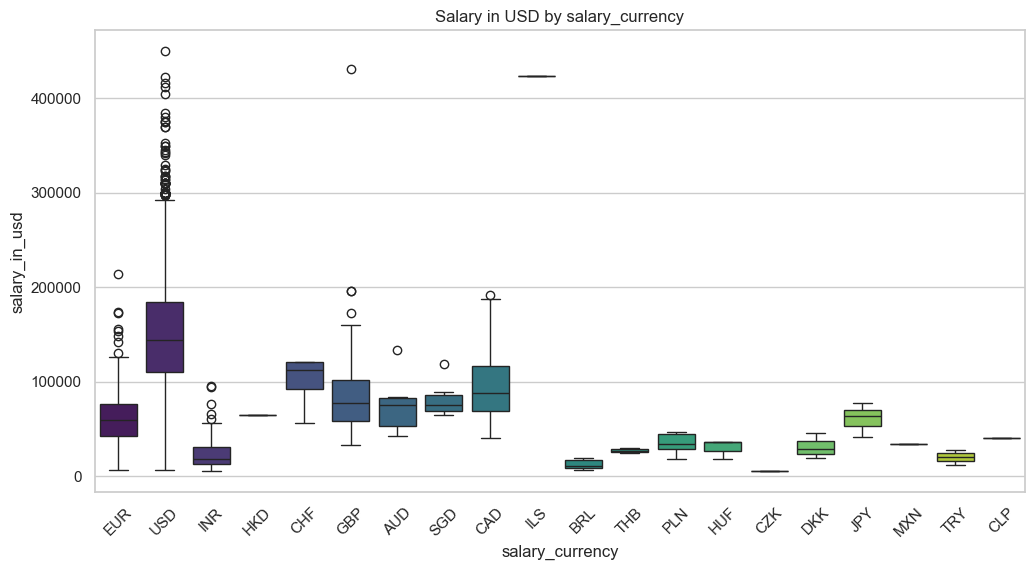

C:\Users\user\AppData\Local\Temp\ipykernel_6184\765653169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='salary_in_usd', palette="viridis")


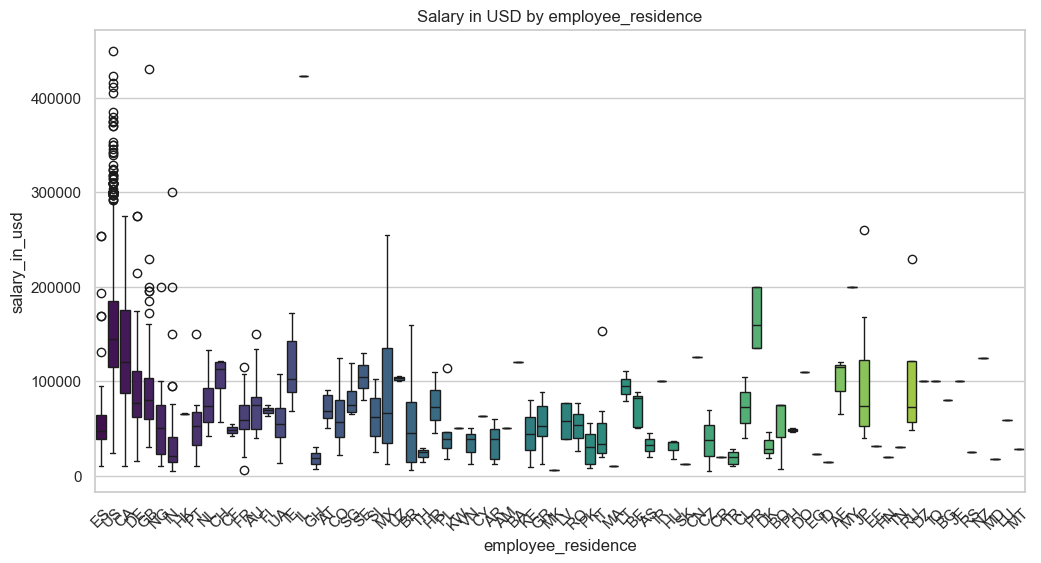

C:\Users\user\AppData\Local\Temp\ipykernel_6184\765653169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='salary_in_usd', palette="viridis")


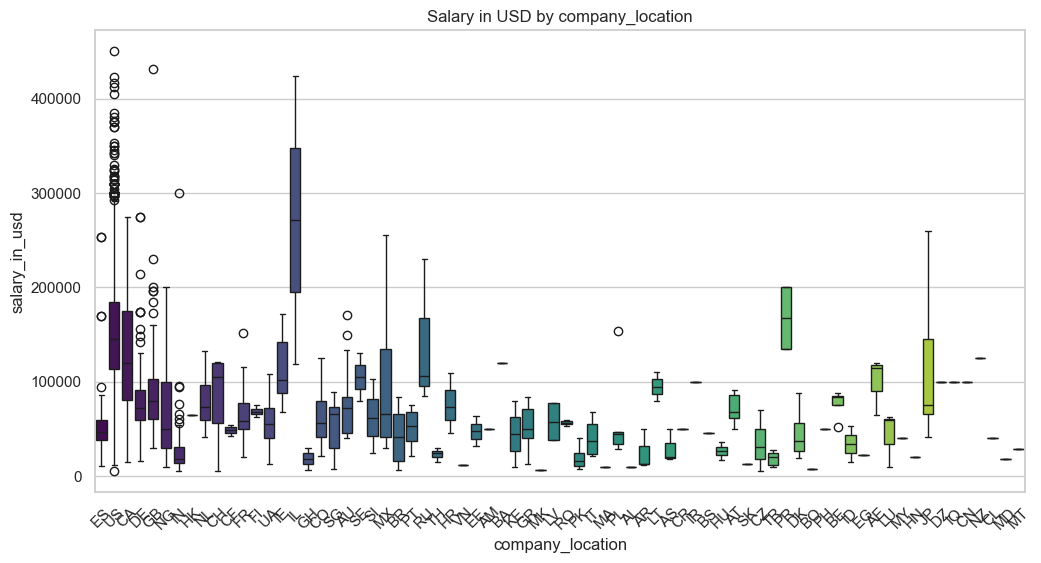

C:\Users\user\AppData\Local\Temp\ipykernel_6184\765653169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='salary_in_usd', palette="viridis")


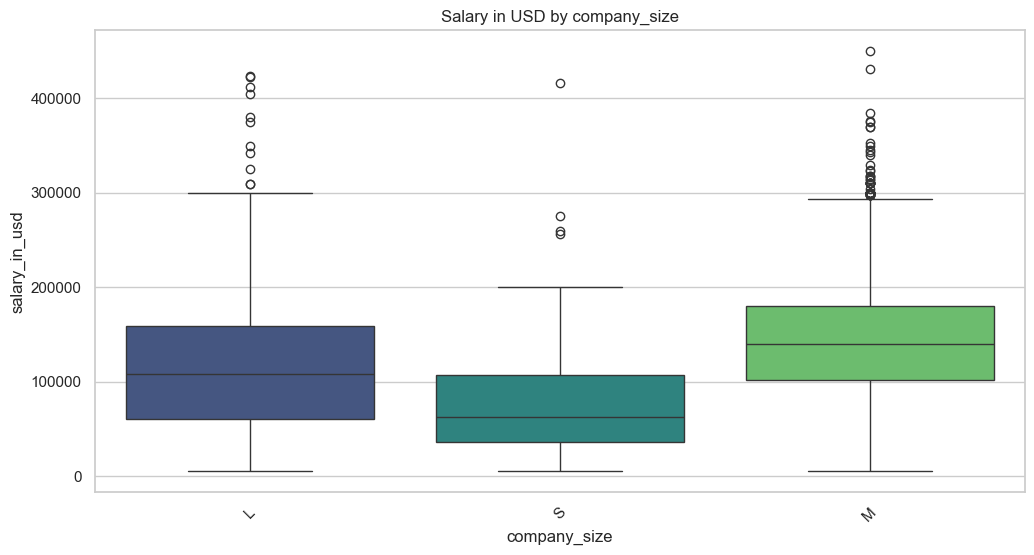

C:\Users\user\AppData\Local\Temp\ipykernel_6184\765653169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='salary_in_usd', palette="viridis")


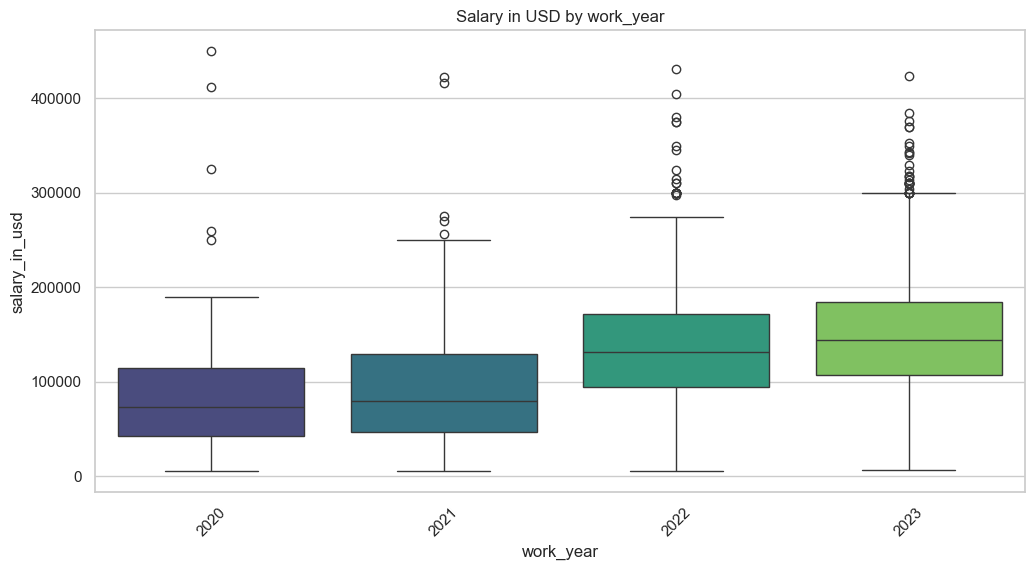

C:\Users\user\AppData\Local\Temp\ipykernel_6184\765653169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='salary_in_usd', palette="viridis")


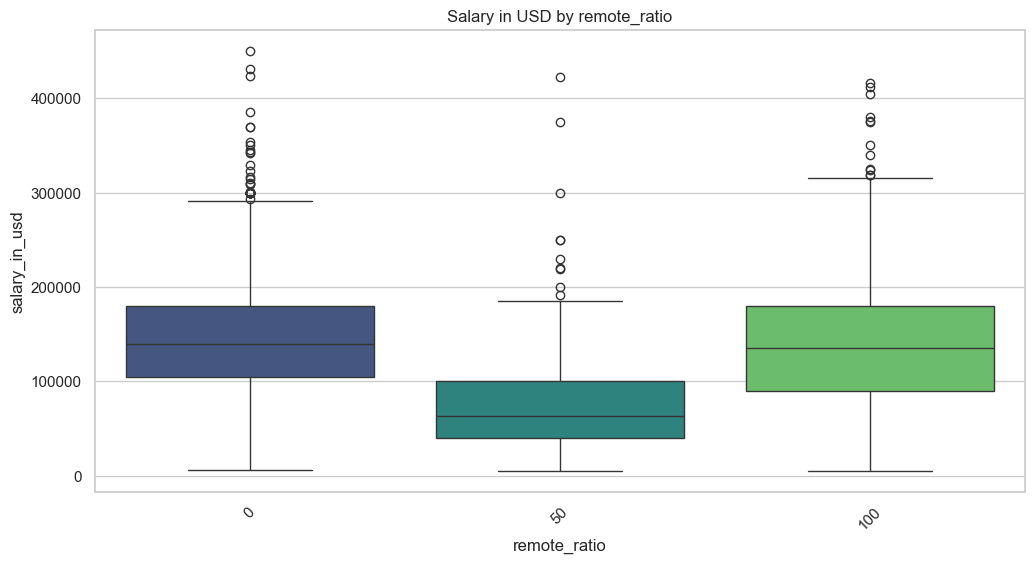

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


for col in cat:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=col, y='salary_in_usd', palette="viridis")
    plt.title(f'Salary in USD by {col}')
    plt.xticks(rotation=45) 
    plt.show()

# Unsupervised Learning: k-mean clustering
### Find the range of salary: We classify the salary_in_usd in to 3 categories bt using k-mean clustering by observing the Elbow plot
#### low_package: < $99,357.78
#### avg_package: $99,357.78 - $178,445.50
#### big_package: > $178,445.50

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


low_package: < $99,357.78
mid_package: $99,357.78 - $178,445.50
high_package: > $178,445.50


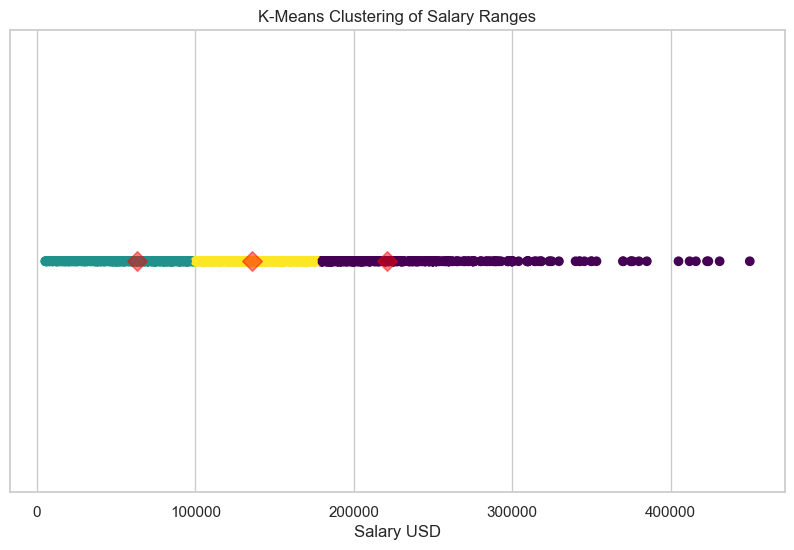

In [8]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df is already loaded and salary_data is a DataFrame column for 'salary_in_usd'
salary_data = df[['salary_in_usd']].dropna()

# Standardizing the salary data
scaler = StandardScaler()
salary_scaled = scaler.fit_transform(salary_data)

# K-Means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(salary_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Sorting the cluster centers and calculating boundaries between clusters
sorted_centers = sorted(centers.flatten())
boundaries = [(sorted_centers[i] + sorted_centers[i+1]) / 2 for i in range(len(sorted_centers)-1)]

# Defining salary ranges
salary_ranges = {
    'low_package': f"< ${boundaries[0]:,.2f}",
    'mid_package': f"${boundaries[0]:,.2f} - ${boundaries[1]:,.2f}",
    'high_package': f"> ${boundaries[1]:,.2f}"
}

for package, range_value in salary_ranges.items():
    print(f"{package}: {range_value}")

# Visualization of the clusters
plt.figure(figsize=(10, 6))
plt.scatter(salary_data.iloc[:, 0], [0]*len(salary_data), c=clusters, cmap='viridis')
plt.scatter(sorted_centers, [0]*len(centers), c='red', s=100, alpha=0.5, marker='D')  # Cluster centers
plt.xlabel('Salary USD')
plt.title('K-Means Clustering of Salary Ranges')
plt.yticks([])
plt.show()


# Supervised Learning: Decision Tree

### Feature Engineering
#### I. We drop the salary, salary_currency and transfer salary_in_usd into salary_level to avoid multicolinearity
#### II. We transfer all the categorical variables into dummy
#### III. We conduct the chi-square test to select the useful categorical variables

### (questionable)
#### Iv. We add the interaction between the variables:
#### 1. experience_level * job_category: This interaction feature helps capture the potential differences in salary between different experience levels within the same job category.

#### 2.company_size * job_category: Larger companies might offer higher salaries for roles like data scientists compared to smaller companies, which may not have the same budget flexibility for specialized roles.

#### 3.company_size * experience_level: Larger companies might reward experience differently, offering higher salaries to senior employees compared to smaller firms, which might have more standardized pay scales.

#### 4.remote_ratio * experience_level: Senior employees might have more flexibility with remote work, or companies might offer different remote work allowances based on experience, influencing overall compensation.

#### I. Transfer salary_in_usd into salary_level

In [11]:
import pandas as pd


def classify_salary(salary):
    if salary < 99357.78:
        return 'low_package'
    elif salary <= 178445.50:
        return 'avg_package'
    else:
        return 'big_package'

df['salary_level'] = df['salary_in_usd'].apply(classify_salary)


In [12]:
### Job category
import pandas as pd

job_category_map = {
    'Principal Data Scientist': 'Data Scientist',
    'ML Engineer': 'Machine Learning Engineer',
    'Data Scientist': 'Data Scientist',
    'Applied Scientist': 'Data Scientist',
    'Data Analyst': 'Data Analyst',
    'Data Modeler': 'Data Engineer',
    'Research Engineer': 'Research & Development',
    'Analytics Engineer': 'Other',
    'Business Intelligence Engineer': 'Other',
    'Machine Learning Engineer': 'Machine Learning Engineer',
    'Data Strategist': 'Other',
    'Data Engineer': 'Data Engineer',
    'Computer Vision Engineer': 'Machine Learning Engineer',
    'Data Quality Analyst': 'Other',
    'Compliance Data Analyst': 'Data Analyst',
    'Data Architect': 'Data Engineer',
    'Applied Machine Learning Engineer': 'Machine Learning Engineer',
    'AI Developer': 'Machine Learning Engineer',
    'Research Scientist': 'Research & Development',
    'Data Analytics Manager': 'Data Analyst',
    'Business Data Analyst': 'Data Analyst',
    'Applied Data Scientist': 'Data Scientist',
    'Staff Data Analyst': 'Data Analyst',
    'ETL Engineer': 'Data Engineer'
}


df['job_category'] = df['job_title'].map(job_category_map)


salary_medians = df.groupby('job_category')['salary_in_usd'].median().sort_values()

print(salary_medians)


job_category
Data Analyst                 106020.0
Data Engineer                138750.0
Other                        143200.0
Data Scientist               143550.0
Machine Learning Engineer    150000.0
Research & Development       150000.0
Name: salary_in_usd, dtype: float64


#### II. Transfer all the categorical variables into dummy

In [13]:
features = df[['experience_level', 'employment_type', 'job_title', 'employee_residence', 
               'company_location', 'company_size', 'work_year', 'remote_ratio']]

# One-hot encoding for categorical variables
categorical_columns = ['experience_level', 'employment_type',   
                       'job_title', 'employee_residence', 'company_location', 'company_size','work_year', 'remote_ratio']
encoded_df = pd.get_dummies(features[categorical_columns], drop_first=True)
encoded_df = encoded_df.astype(int)


# Display the DataFrame to check it
print(encoded_df.head())

   work_year  remote_ratio  experience_level_EX  experience_level_MI  \
0       2023           100                    0                    0   
1       2023           100                    0                    1   
2       2023           100                    0                    1   
3       2023           100                    0                    0   
4       2023           100                    0                    0   

   experience_level_SE  employment_type_FL  employment_type_FT  \
0                    1                   0                   1   
1                    0                   0                   0   
2                    0                   0                   0   
3                    1                   0                   1   
4                    1                   0                   1   

   employment_type_PT  job_title_AI Developer  job_title_AI Programmer  ...  \
0                   0                       0                        0  ...   
1           

#### III. Conduct the chi-square test to select the useful categorical variables
We found the all categorical variable has small p-value, which mean we should use all the variables

In [14]:
# Chi-square for testing the relationship between salary and each categorical variable

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency


label_encoder = LabelEncoder()
df['salary_level_encoded'] = label_encoder.fit_transform(df['salary_level'])


categorical_columns = ['experience_level', 'job_title', 'employment_type',
                       'employee_residence', 'company_location', 'company_size', 
                       'work_year', 'remote_ratio','salary_currency','job_category']


for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['salary_level_encoded'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}:\nChi2 Statistic: {chi2}, p-value: {p}\n")

experience_level:
Chi2 Statistic: 801.7392127756522, p-value: 6.4816413959330674e-170

job_title:
Chi2 Statistic: 696.9392884837396, p-value: 9.964124433020338e-61

employment_type:
Chi2 Statistic: 49.78983916668937, p-value: 5.179885081440237e-09

employee_residence:
Chi2 Statistic: 1421.763807586722, p-value: 5.999518295295153e-204

company_location:
Chi2 Statistic: 1335.373779664008, p-value: 5.211669100313169e-193

company_size:
Chi2 Statistic: 266.0223711661104, p-value: 2.2967679501117386e-56

work_year:
Chi2 Statistic: 260.36040610063236, p-value: 2.50142796616676e-53

remote_ratio:
Chi2 Statistic: 251.6408354388004, p-value: 2.8845365948261303e-53

salary_currency:
Chi2 Statistic: 1167.7672638769147, p-value: 2.6525758758698363e-220

job_category:
Chi2 Statistic: 220.85169286892543, p-value: 7.089394123674037e-42



# Modeling
hyperparameter tuning and without interaction feature

Final Shape of X with interaction terms: (3755, 282)
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-validation Score: 0.6347151910193736
Test Set Accuracy: 0.6228926353149956
Classification Report:
               precision    recall  f1-score   support

 avg_package       0.60      0.84      0.70       573
 big_package       0.50      0.20      0.29       259
 low_package       0.77      0.57      0.65       295

    accuracy                           0.62      1127
   macro avg       0.62      0.54      0.55      1127
weighted avg       0.62      0.62      0.59      1127

Confusion Matrix:
 [[481  45  47]
 [202  53   4]
 [119   8 168]]
Top 20 most important features:
                                     Feature  Importance
178                   employee_residence_US    0.396861
2                       experience_level_EN    0.062206
276               job_c

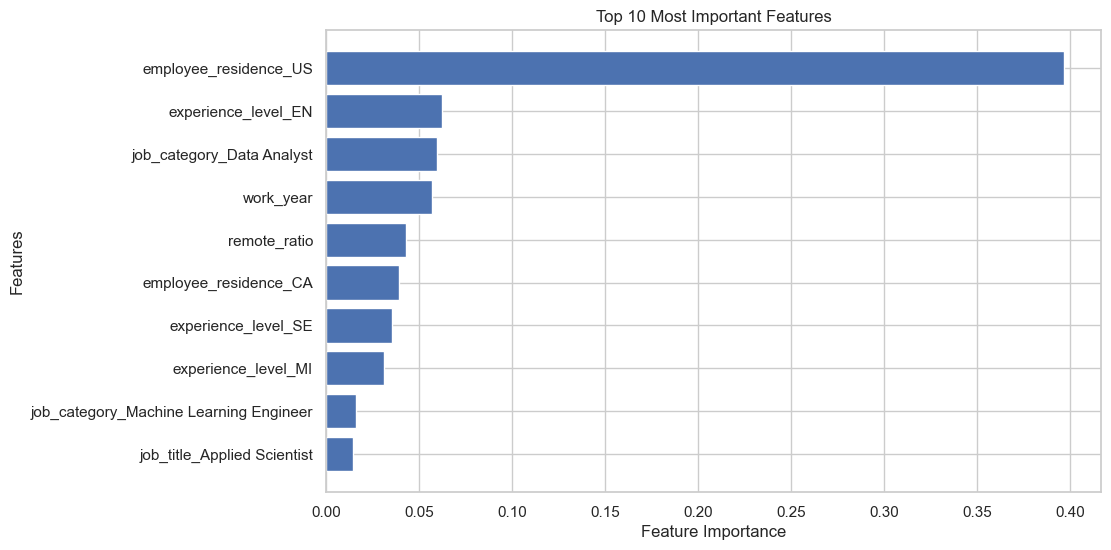

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

X = pd.get_dummies(df[categorical_columns])
y = df['salary_level']

print("Final Shape of X with interaction terms:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

# hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model evaluation
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Feature Importance analysis
feature_importances = best_model.feature_importances_
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Top 20 most important features:\n", important_features.head(20))

import matplotlib.pyplot as plt

top_features = important_features.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  
plt.show()


### Add interaction features
#### Based on finding the importance feature, I select the interaction feature

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-validation Score: 0.6316740901683867
Test Set Accuracy: 0.6246672582076309
Classification Report:
               precision    recall  f1-score   support

 avg_package       0.60      0.84      0.70       573
 big_package       0.49      0.19      0.27       259
 low_package       0.76      0.59      0.67       295

    accuracy                           0.62      1127
   macro avg       0.62      0.54      0.55      1127
weighted avg       0.62      0.62      0.59      1127



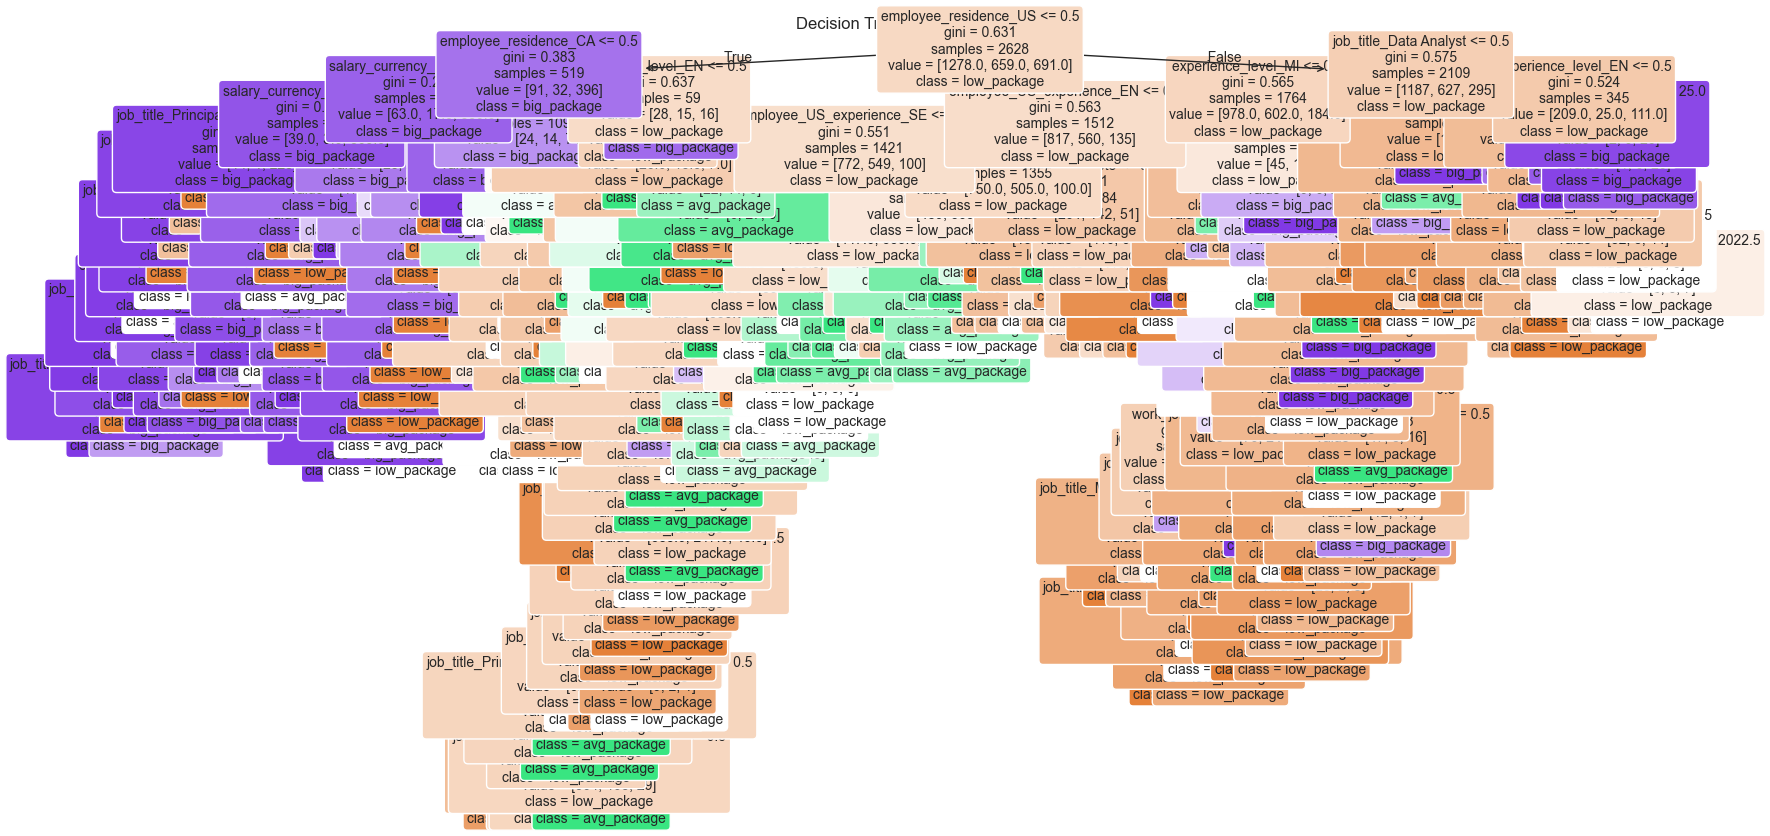

In [39]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

X = pd.get_dummies(df[categorical_columns])
y = df['salary_level']

# Adding refined interaction features
X['employee_US_experience_EN'] = X['employee_residence_US'] * X['experience_level_EN']
X['employee_US_experience_MI'] = X['employee_residence_US'] * X['experience_level_MI']
X['employee_US_experience_SE'] = X['employee_residence_US'] * X['experience_level_SE']
X['employee_US_work_year'] = X['employee_residence_US'] * X['work_year']
X['employee_US_job_title_Data Analyst'] = X['employee_residence_US'] * X['job_title_Data Analyst']
X['experience_EN_remote'] = X['experience_level_EN'] * X['remote_ratio']
X['employee_US_remote'] = X['employee_residence_US'] * X['remote_ratio']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree model
dt = DecisionTreeClassifier(random_state=42)

# Defining parameters for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Hyperparameter Tuning with GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Using the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model evaluation
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=y.unique().astype(str), filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


### Visualizing the model

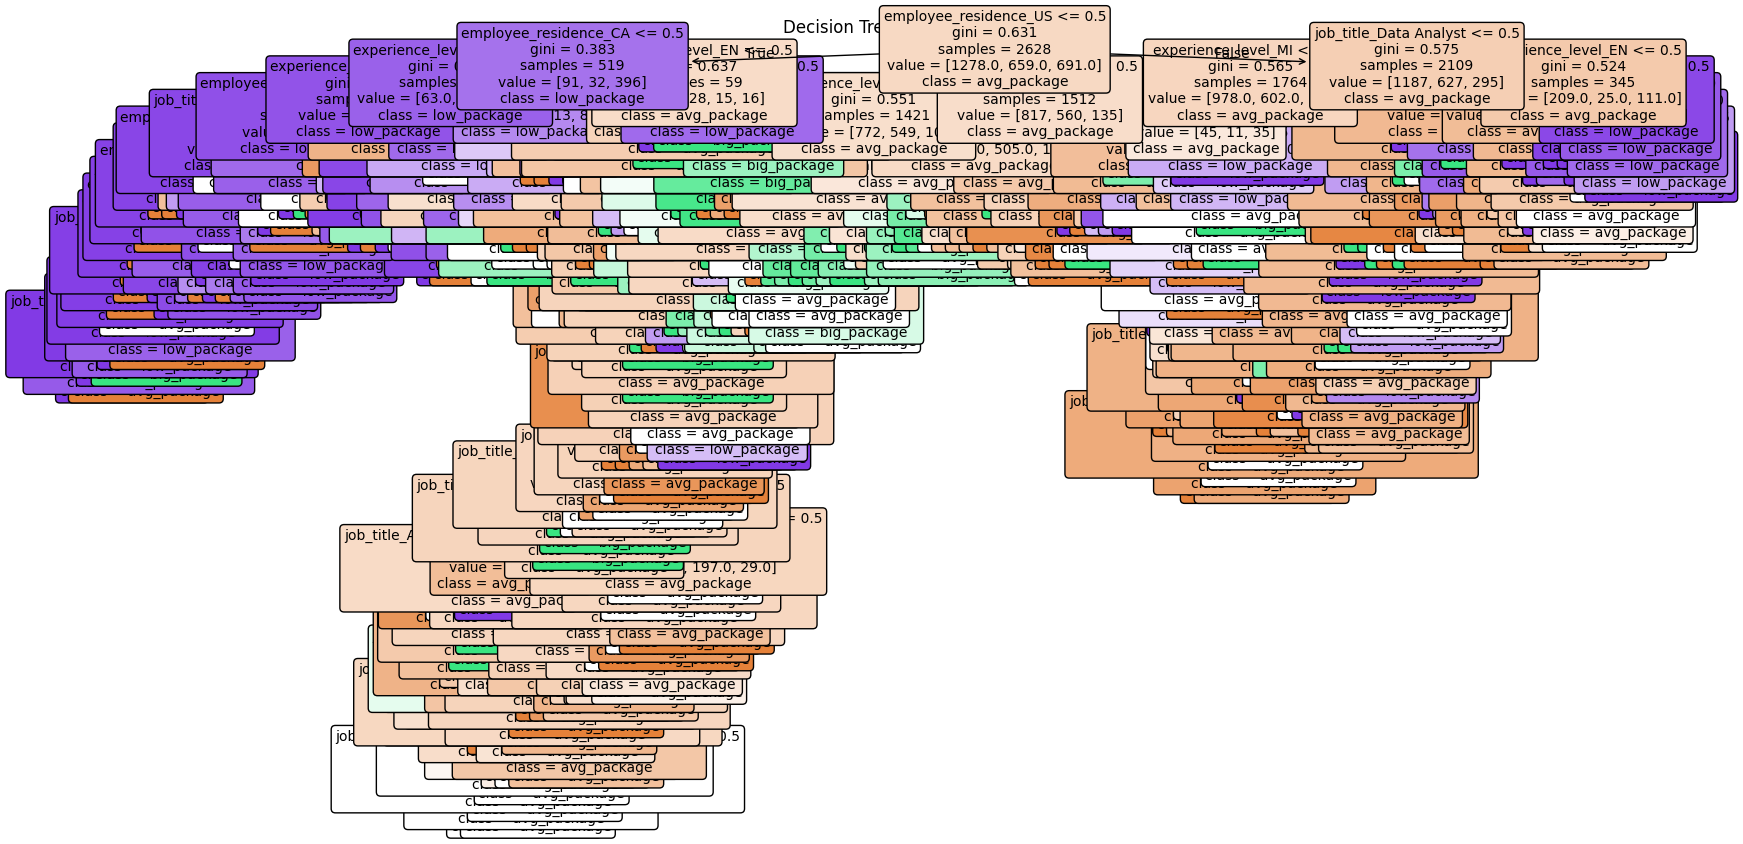

Decision Tree Visualization


In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
import matplotlib.pyplot as plt
import numpy as np

# Assuming df and categorical_columns are predefined
X = pd.get_dummies(df[categorical_columns])
y = df['salary_level']  # Categorical target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Visualizing the Decision Tree
plt.figure(figsize=(20,10))  # Set the size of the figure to be large enough to visualize the tree well
plot_tree(dt_classifier, feature_names=X.columns, class_names=np.unique(y).astype(str),
          filled=True, rounded=True, fontsize=10)  # Adjust fontsize according to your preference
plt.title('Decision Tree Visualization')
plt.show()

# Print the string 'Decision Tree Visualization' to the console
print('Decision Tree Visualization')


### Evaluating the Model

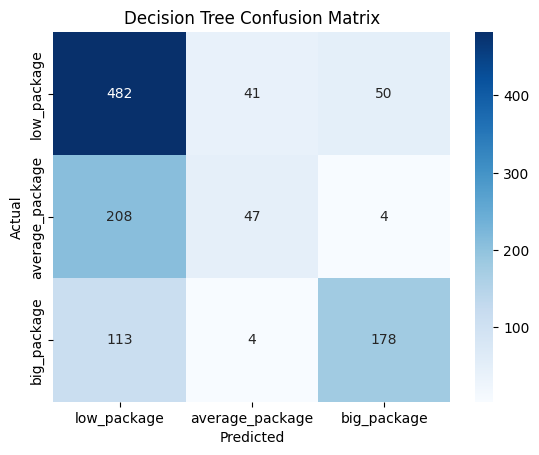

In [40]:
# Confusion Matrix
import seaborn as sns  # 加入 seaborn 庫
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['low_package', 'average_package', 'big_package'], yticklabels=['low_package', 'average_package', 'big_package'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Predicting the Classes

In [42]:
X_new = pd.DataFrame(columns=X.columns)

new_data = {
    'experience_level_SE': [1],
    'employment_type_FT': [1],
    'job_title_Data Scientist': [1],
    'employee_residence_US': [1],
    'company_location_US': [1],
    'company_size_M': [1],
    'work_year': [2023],
    'remote_ratio': [100]
}

X_new = pd.concat([X_new, pd.DataFrame(new_data)], ignore_index=True)

# Predict the Salary Level
prediction = dt_classifier.predict(X_new.fillna(0))  
print("Predicted Salary Level:", prediction)

# Predict the class probabilities
class_probabilities = dt_classifier.predict_proba(X_new)
print("Predicted Class Probabilities:", class_probabilities)


Predicted Salary Level: ['avg_package']
Predicted Class Probabilities: [[0.5    0.4375 0.0625]]


C:\Users\user\AppData\Local\Temp\ipykernel_16964\1526326095.py:17: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

